In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

import sys
sys.path.append('../src')
from models import neuralnet as nn

In [2]:
df = pd.read_csv('../data/winequality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


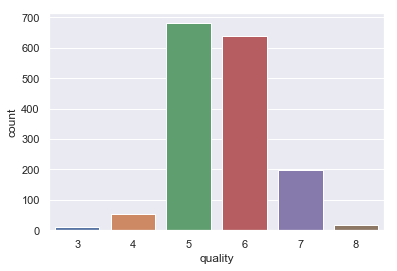

In [5]:
sns.countplot(x="quality", data=df)

In [6]:
filter = df['quality']
df.loc[filter <= 5, 'quality'] = 0 # Low-quality
df.loc[filter >= 6, 'quality'] = 1 # High-quality

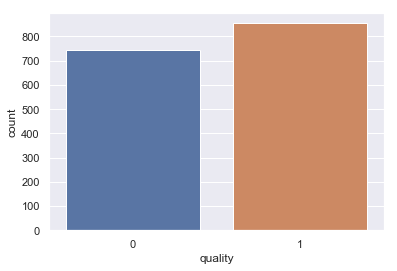

In [7]:
sns.countplot(x="quality", data=df)

In [8]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# NumPy配列に変換
X, y = X.values, y.values

In [9]:
X_train, X_test, y_train, y_test \
= train_test_split(X, y, test_size=0.4, random_state=2525, stratify=y)

In [10]:
model = nn.NeuralNetwork(n_output=2, 
                 n_features=X_train.shape[1], 
                 n_hidden=100, 
                 l2=0.01,
                 l1=0.01,
                 epochs=200,
                 eta=0.01,
                 decrease_const=0.0001,
                 n_minibatches=30, 
                 shuffle=True,
                 random_state=2525)

In [11]:
model.fit(X_train, y_train, print_progress=True)

Epoch: 200/200

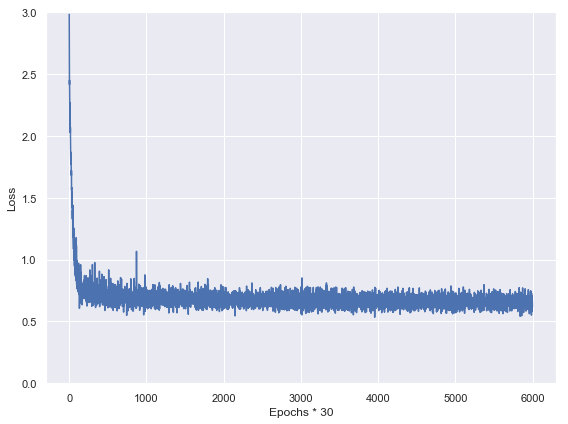

In [12]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.plot(range(len(model.loss_)), model.loss_)
ax.set_ylim([0, 3])
ax.set_ylabel('Loss')
ax.set_xlabel(f'Epochs * {model.n_minibatches}')
plt.tight_layout()
plt.savefig('../figures/loss.png')
plt.show()

In [13]:
path = '../models/model_sample.pickle'
with open(path, mode='wb') as fp:
    pickle.dump(model, fp)

In [14]:
with open(path, mode="rb") as fp:
    model_ = pickle.load(fp)
print(model_)

In [15]:
acc_train = model.accuracy(X_train, y_train)
acc_test = model.accuracy(X_test, y_test)
print(f'acc(training): {100 * acc_train:.1f}%')
print(f'acc(test): {100 * acc_test:.1f}%')

acc(training): 64.9%
acc(test): 61.3%


In [18]:
results = {}
results['[training]'] = [y_train, np.argmax(model.predict(X_train), axis=1)]
results['[test]'] = [y_test, np.argmax(model.predict(X_test), axis=1)]
names = ['Low-quality(3~5)', 'High-quality(6~8)']
for key, value in results.items():
    print(f'{key}')
    print(classification_report(value[0], value[1], target_names=names))
    print('- - - ' * 10)

[training]
                   precision    recall  f1-score   support

 Low-quality(3~5)       0.66      0.50      0.57       446
High-quality(6~8)       0.64      0.78      0.70       513

         accuracy                           0.65       959
        macro avg       0.65      0.64      0.64       959
     weighted avg       0.65      0.65      0.64       959

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
[test]
                   precision    recall  f1-score   support

 Low-quality(3~5)       0.61      0.46      0.52       298
High-quality(6~8)       0.61      0.75      0.67       342

         accuracy                           0.61       640
        macro avg       0.61      0.60      0.60       640
     weighted avg       0.61      0.61      0.60       640

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
